# MEIxplica - Data Challenge Santander*

Projeto desenvolvido para o hackathon promovido pela Shawee com o intuito de utilizar a ciência de dados para apoiar micro e médio empreendedor diante da crise sanitária, e agora econômica, decorrente do novo coronavírus. O objetivo desse notebook é explorar, tratar e analisar os dados a fim de gerar insights para o pequeno e médio empreendedor do varejo, focando principalmente no ensino da leitura desses dados por meio do site:

## [***MEIxplica***](https://sites.google.com/view/meixplica)

A plataforma visa atuar de forma aberta permitindo que os usuários que possuam conhecimento possam acessar esse notebook e avançar em seus estudos sobre mercado.

_*Projeto desenvolvido entre os dias 01 e 02 de agosto de 2020._



## Configuração do Ambiente
Nesta seção realizam-se os imports e instalação das bibliotecas necessárias no ambiente remoto. 

Selenium foi utilizado para fazer scrapping de dados dinâmicos na 

1.   Selenium     - Raspagem de dados da internet;
2.   Numpy        - Funções matemáticas e manipulação de matrizes para computação científica;
3.   Pandas       - Manipulação e tratamento de dados;
4.   Matplotlib   - Representação gráfica vetorial de resultados;
5.   Seaborn      - Representação gráfica vetorial de resultados;
6.   BeatifulSoup - Raspagem de dados da internet e tratamento de arquivos html;
7.   Pytrends     - Consulta direta da base de dados de tendências do Google.


### Instalação de bibliotecas faltantes



In [ ]:
!pip3 install selenium 
!pip3 install pytrends
# Instalacao de drivers para seu navegador, como fazer isso no Colab??? 
# https://pypi.org/project/selenium/

!apt-get update 
!apt install chromium-chromedriver

     |████████████████████████████████| 911kB 4.7MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.

### Importação de ferramentas necessárias de suas bibliotecas

In [ ]:
from pytrends.request import TrendReq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Estudo IPCA
Consultando o portalbrasil que atualiza o Índice Nacional de Preços ao Consumidor Amplo (IPCA), foi proposto um estudo inicial do seu comportamento nos últimos 15 anos para uma primeira conscientização do seu comportamento.

### Webdriver para consulta ao site

In [ ]:
driver = webdriver.Chrome('chromedriver',options=chrome_options)
url_ipca = "https://www.portalbrasil.net/ipca/"
driver.get( url_ipca )

table = driver.find_element_by_xpath('//table[@class="has-fixed-layout"]')

html_table = table.get_attribute( 'outerHTML' )
soup_table = BeautifulSoup( html_table, 'html.parser' )

df_ipca = pd.read_html( str(soup_table) )[0]

df_ipca.columns = ['Date', 'Monthly', 'Percent', 'CumSum', 'Trash']
df_ipca['CumSum'] = df_ipca['CumSum'].astype(float)/10000
df_ipca = df_ipca.iloc[::-1]
df_ipca[['Date','CumSum']].to_csv(r'ipca_cumsum.csv', index = False)

driver.quit()


NoSuchElementException: ignored

### Evolução do IPCA acumulado de 12 meses 

In [ ]:
months = 12   # Set the roll period for median study
roll = df_ipca['CumSum'].rolling(months)
first_quartile_ipca = roll.quantile(0.25)
third_quartile_ipca = roll.quantile(0.75)
median_ipca = roll.median()

for i in range(months):
  roll.median()[len(median_ipca)-i-2] = df_ipca['CumSum'].median()
  roll.median()[len(median_ipca)-i-2] = df_ipca['CumSum'].median()
  roll.median()[len(median_ipca)-i-2] = df_ipca['CumSum'].median()

fig, ax = plt.subplots()

x = np.arange(-100, 300, 0.1 )
ax.fill_between( range(198), first_quartile_ipca, third_quartile_ipca, facecolor='black', alpha=0.3 )
ax.plot( df_ipca.Date, df_ipca.CumSum, '-' )
ax.plot( range(198), median_ipca, color='r', linestyle='dashed', linewidth=1)
ax.set_xlabel('Mês/Ano')
ax.set_ylabel('IPCA Acumulada')

labels = ax.get_xticklabels();
labels = ['' for i in range(len(labels))];
for i in range(5):
  labels[i*int(len( median_ipca)/5 ) ] = df_ipca.Date[ i*int((len(median_ipca)-2)/5)];
labels[len(median_ipca)-2] = df_ipca.Date[ len(median_ipca)-2];
ax.set_xticklabels( reversed(labels) );

NameError: ignored

## Estudo de Indice de Comércio (PMC - Pesquisa Mensal do Comércio)

Sobre o Índice de Comércio https://www.ibge.gov.br/estatisticas/economicas/comercio/9227-pesquisa-mensal-de-comercio.html?=&t=o-que-e

In [ ]:
!pwd

indice_comercio = pd.read_excel("pmc_202005_05.xls",
                   header=4,
                   nrows=15,
                   usecols="A:N",
                   index_col = 0)

drop = ['Comércio Varejista (1)',
        '4. Móveis e eletrodomésticos',
        'Comércio Varejista Ampliado (2)']

indice_comercio.drop(drop, inplace = True)

months_mapper = {'jan': 1,
             'fev': 2,
             'mar': 3,
             'abr': 4,
             'mai': 5,
             'jun': 6,
             'jul': 7,
             'ago': 8,
             'set': 9,
             'out': 10,
             'nov': 11,
             'dez': 12}

def subs_month_number(mes):
    
    if type(mes) == str:
        mes,ano = mes.split("/")
        mes = months_mapper[mes]
        date = f'{mes}/{ano}'
        return pd.to_datetime(date)
    
    return mes

indice_comercio.columns = indice_comercio.columns.map(lambda mes: subs_month_number(mes))

indice_comercio = indice_comercio.T

/content


In [ ]:
indice_comercio.columns

Index(['1. Combustíveis e lubrificantes',
       '2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo',
       '2.1. Hipermercados e supermercados',
       '3. Tecidos, vestuário e calçados', '4.1. Móveis',
       '4.2. Eletrodomésticos',
       '5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos',
       '6. Livros, jornais, revistas e papelaria',
       '7. Equipamentos e materiais para escritório, informática e comunicação',
       '8. Outros artigos de uso pessoal e doméstico',
       '9. Veículos, motocicletas, partes e peças',
       '10. Material de construção'],
      dtype='object')

Text(0, 0.5, 'Índice de Vendas IBGE')

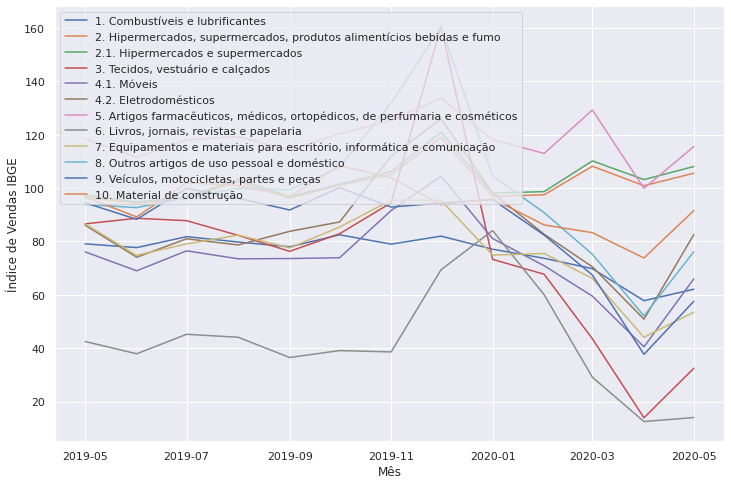

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))

for col in indice_comercio.columns:
    ax.plot(col, data = indice_comercio, label = col)

plt.legend(loc = 2)
ax.set_xlabel("Mês")
ax.set_ylabel("Índice de Vendas IBGE")

Vamos focar a análise em setores da economia que ainda estão em um patamar abaixo de 03-2020, indicando que foram afetados pelo coronavírus, e em um patamar abaixo de 05-2019, removendo possíves efeitos de sazonalidade.

In [ ]:
bol = (indice_comercio.loc['2020-05-01'] < indice_comercio.loc['2019-05-01']) & (indice_comercio.loc['2020-05-01'] < indice_comercio.loc['2020-03-01'])
bol[bol].index

Index(['1. Combustíveis e lubrificantes', '3. Tecidos, vestuário e calçados',
       '5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos',
       '6. Livros, jornais, revistas e papelaria',
       '7. Equipamentos e materiais para escritório, informática e comunicação',
       '9. Veículos, motocicletas, partes e peças'],
      dtype='object')

Os setores são: 

*   'Combustíveis e lubrificantes'
*   'Tecidos, vestuário e calçados',
* 'Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos',
* 'Livros, jornais, revistas e papelaria',
* 'Equipamentos e materiais para escritório, informática e comunicação',
* 'Veículos, motocicletas, partes e peças'

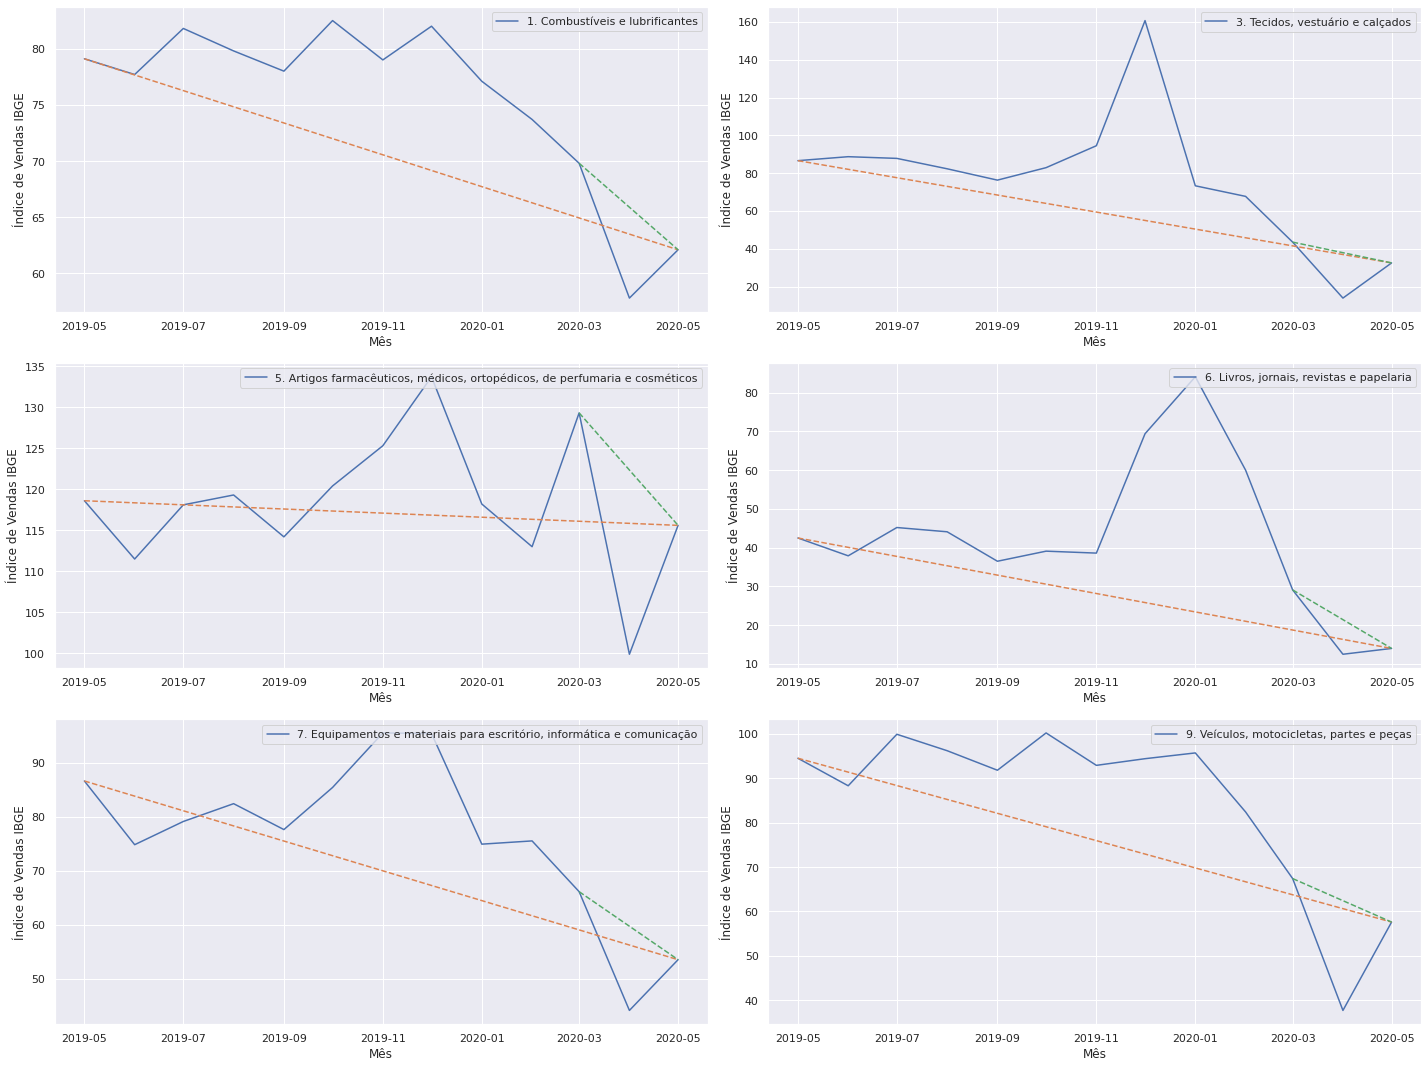

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (20,15))

ax = ax.ravel()

setores = ['1. Combustíveis e lubrificantes', '3. Tecidos, vestuário e calçados',
       '5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos',
       '6. Livros, jornais, revistas e papelaria',
       '7. Equipamentos e materiais para escritório, informática e comunicação',
       '9. Veículos, motocicletas, partes e peças']

for i,col in enumerate(setores):

    ax[i].plot(col, data = indice_comercio, label = col)

    ##Comparação com Maio de 2019
    x = indice_comercio.index[0]
    y = indice_comercio.loc[x,col]
    x_ = indice_comercio.index[-1]
    y_ = indice_comercio.loc[x_,col]
    X = [x,x_]
    Y = [y,y_]
    ax[i].plot(X,Y, linestyle = '--')

    ##Comparação com Março de 2020
    x = indice_comercio.index[-3]
    y = indice_comercio.loc[x,col]
    x_ = indice_comercio.index[-1]
    y_ = indice_comercio.loc[x_,col]
    X = [x,x_]
    Y = [y,y_]
    ax[i].plot(X,Y, linestyle = '--')

    ax[i].legend(loc = 1)
    ax[i].set_xlabel("Mês")
    ax[i].set_ylabel("Índice de Vendas IBGE")

plt.tight_layout()

Coleta e agrupamento por região de CNPJs ativos por UF levando em consideração todos os diferentes setores das empresas.

In [ ]:
# SCRAP CNAE BY UF
driver = webdriver.Chrome('chromedriver',options=chrome_options)
url_cnae = "http://www.portaldoempreendedor.gov.br/estatisticas"
driver.get( url_cnae )

time.sleep(5)
# driver.find_element_by_xpath("//div[@class='tab-pane active']//ul//li//a[contains(., = 'CNAE/UF')]").click()
driver.find_element_by_xpath("//*[contains(text(), 'CNAE/UF')]").click()

time.sleep(5)
ufs = driver.find_elements_by_xpath("//div[@id='form:identificacao_body']//select//option")

for uf in ufs:
    b.find_element_by_xpath("//select[@name='element_name']/option[@value={uf.text}]").click()
    time.sleep(3)
    driver.find_element_by_xpath('//div[@id="form:botaoExportarCsv"]').click()
    os.rename(r'relatorio_mei.csv',r('['+str(uf.text)+']relatorio_mei.csv'))

## Estudo de Tendências de Consumo

Esta seção avança em direção à construção de um sistema de recomendação compartilhado entre empreendedores do varejo, obtendo dados de bases consolidadas, podendo obter contribuição dos usuários empreendedores com seus dados.

### Tendências em Grandes sites de compras

Primeiramente é feito a coleta dos dados dinamicos atualizados diariamente por meio da raspagem de sites de grandes players do varejo virtual. Fornecendo assim um panorama geral e por setores sobre o cenário atual.



In [ ]:
# Scrapping de Tendência ML
url_trends = "https://tendencias.mercadolivre.com.br/"
driver_ml = webdriver.Chrome('chromedriver',options=chrome_options)
driver_ml.get(url_trends)

links = driver_ml.find_elements_by_xpath("//div[@class='andes-card sidebar__card']//ul//li//a")

category = []
for x in links:
    print("\n " + str(x.text) )
    url_prod = str(x.get_attribute('href'))

    userAgents=[
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"
    ]


    products=[]

    doc = requests.get(url_prod)
        
    analizador = BeautifulSoup(doc.content, 'html.parser')
        
    produtos = analizador.find_all('li', class_="searches__item")
        
    for unidade in produtos:
        uni={}
        uni['produto']  = unidade.find("a").contents[0].strip() 
        
        products.append(uni)
        
    all_prods = pd.DataFrame(columns=uni.keys())
    all_prods = all_prods.append(products)

    category.append(all_prods)

### Tendências de buscas no Google

Ampliamos a base de dados com a inclusão de tendências no maior buscador da internet, utilizando dados disponíveis no [Google Trends](https://trends.google.com.br/trends/?geo=BR).

In [ ]:
trend = TrendReq(hl='pt-BR', tz=180)
item = all_produtos.iloc[0,0]
trend.build_payload([item], cat=0, timeframe='today 3-m', geo='BR', gprop='froogle')

In [ ]:
trend.interest_over_time().head()

In [ ]:
trend.interest_by_region(resolution='REGION').head()

In [ ]:
Queries = trend.related_queries()
Tendencia = Queries[item]['rising']
Top = Queries[item]['top']

In [ ]:
Tendencia

In [ ]:
Top.head()

Outras possíveis fontes de dados podem ser acrescidas com o avanço desse estudo, como por exemplo o [Amazon Reviews](https://s3.amazonaws.com/amazon-reviews-pds/readme.html) e o [RED - Epinions](https://projet.liris.cnrs.fr/red/).

## Estudo dos setores de MEIs mais afetados pela crise

Buscando elucidar os mercados mais impactados pela crise sanitária identificamos novamente por setores em âmbito federal os impactos para cris para um possível cruzamento com os dados de cada setor.

In [ ]:
df = pd.read_csv("MEI_CNAE.csv")

In [ ]:
def achar_palavras(x, lista_de_palavras):
    for palavra in lista_de_palavras:
        if palavra.upper() in x.upper():
            return True
    return False

def plotMEI(df, titulo):
    
    df = df.sort_values("TOTAL", ascending=False)
    
    fig, ax = plt.subplots(figsize = (10,8))
    sns.barplot(x="TOTAL", y="Descrição", data=df, ax = ax)
    plt.title(titulo)
    plt.xlabel("Empreendedores MEI")

    total=df["TOTAL"].sum()
    for p in ax.patches:
        percentage ='{:,.3f}%'.format(100*p.get_width()/total)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        ax.annotate(percentage,(x,y))
        
    indexes, texts = plt.yticks()
    for text in texts:
        split_text = text.get_text().split(" ")
        break_index = int(len(split_text)/2) + 1
        split_text.insert(break_index,"\n")
        new_text = ' '.join(split_text)
        text.set_text(new_text)

    plt.yticks(indexes, texts)

In [ ]:
#Setor de Combustíveis e lubrificantes
lista = ['lubrifi','combus']
bol1 = df["Descrição"].apply(lambda x: achar_palavras(x,lista))
bol2 = df[bol1]["Descrição"].apply(lambda x: 'Comércio' in x)
df_lub = df[bol1][bol2]

In [ ]:
titulo = 'Setor de Combustíveis e lubrificantes'
plotMEI(df_lub,titulo)

In [ ]:
#Setor de Tecidos, vestuário e calçados
lista = ['tecid','vestu','calç','sapa']
bol1 = df["Descrição"].apply(lambda x: achar_palavras(x,lista))
bol2 = df[bol1]["Descrição"].apply(lambda x: 'Comércio var' in x)
df_vest = df[bol1][bol2]

In [ ]:
titulo = 'Setor de Tecidos, vestuário e calçados'
plotMEI(df_vest,titulo)

In [ ]:
# Setor Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos
lista = ['farma','médic','ortop','perfum','cosmé']
bol1 = df["Descrição"].apply(lambda x: achar_palavras(x,lista))
bol2 = df[bol1]["Descrição"].apply(lambda x: 'Comércio var' in x)
df_farm = df[bol1][bol2]

In [ ]:
titulo = 'Setor de Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos'
plotMEI(df_farm,titulo)

In [ ]:
# Setor Livros, jornais, revistas e papelaria'
lista = ['livr','jorna','revis','papela']
bol1 = df["Descrição"].apply(lambda x: achar_palavras(x,lista))
bol2 = df[bol1]["Descrição"].apply(lambda x: 'Comércio' in x)
df_livr = df[bol1][bol2]

In [ ]:
titulo = 'Setor de Livros, jornais, revistas e papelaria'
plotMEI(df_livr,titulo)

In [ ]:
# Setor Equipamentos e materiais para escritório, informática e comunicação
lista = ['escrit','inform','comunica']
bol1 = df["Descrição"].apply(lambda x: achar_palavras(x,lista))
bol2 = df[bol1]["Descrição"].apply(lambda x: 'Comércio var' in x)
df_escrt = df[bol1][bol2]

In [ ]:
titulo = 'Setor de equipamentos e materiais para escritório, informática e comunicação'
plotMEI(df_escrt,titulo)

In [ ]:
# Setor Veículos, motocicletas, partes e peças
lista = ['veíc','moto']
bol1 = df["Descrição"].apply(lambda x: achar_palavras(x,lista))
bol2 = df[bol1]["Descrição"].apply(lambda x: 'Comércio a var' in x)
df_veic = df[bol1][bol2]

In [ ]:
titulo = 'Setor de veículos, motocicletas, partes e peças'
plotMEI(df_veic,titulo)

## Estudo dos Players (Principais plataformas de e-Commerce do Brasil)

Levantamento dos maiores players no mercado virtual bem como o comportamento dos usuários perante a esses mesmos. 

Disponível em [Qual o maior e-commerce do Brasil?](https://www.moneytimes.com.br/qual-e-o-maior-e-commerce-do-brasil-mercado-livre-b2w-ou-magalu-btg-te-conta/)

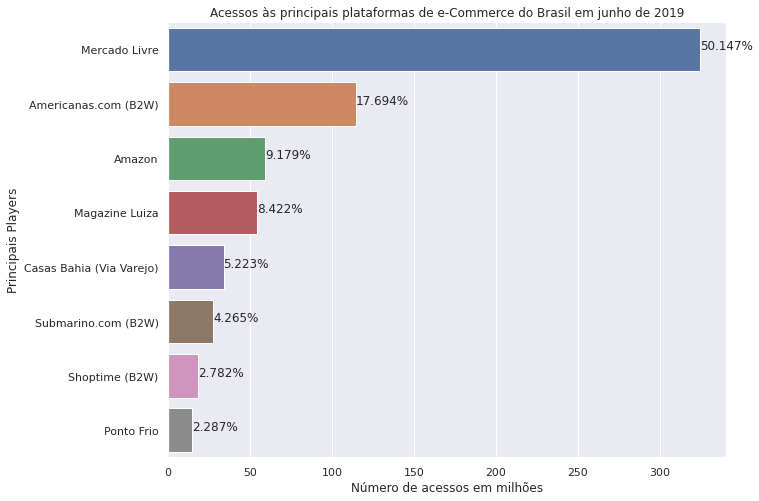

In [ ]:
## Dados obtidos do Moneytimes

Players = ["Mercado Livre",
           "Americanas.com (B2W)",
           "Magazine Luiza",
           "Casas Bahia (Via Varejo)",
           "Submarino.com (B2W)",
           "Amazon",
           "Shoptime (B2W)",
           "Ponto Frio"]

Visitas = [324.5,
           114.5,
           54.5,
           33.8,
           27.6,
           59.4,
           18.0,
           14.8]

df = pd.DataFrame()
df["Principais Players"] = Players
df["Visitas (em milhões)"] = Visitas

df["Market Share (%)"] = 100*df["Visitas (em milhões)"]/df["Visitas (em milhões)"].sum()

titulo = "Acessos às principais plataformas de e-Commerce do Brasil em junho de 2019"

df = df.sort_values("Visitas (em milhões)", ascending=False)

fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="Visitas (em milhões)", y="Principais Players", data=df, ax = ax)
plt.title(titulo)
plt.xlabel("Número de acessos em milhões")

total=df["Visitas (em milhões)"].sum()
for p in ax.patches:
    percentage ='{:,.3f}%'.format(100*p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))